<a href="https://colab.research.google.com/github/Alepescinaa/ScientificTools/blob/main/Lab_Ricky/Lab2/NeuralNetwork_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises: neural network overfitting

Exercise on classification using NN.

Date: 2024

Course: 056936 - SCIENTIFIC COMPUTING TOOLS FOR ADVANCED MATHEMATICAL MODELLING (PAGANI STEFANO) [2023-24].


Exercise on overfitting.
Example adapted from:
[3] Tensorflow tutotials
Data from:
[1] Brunton, S. L., & Kutz, J. N. (2022).
Data-driven science and engineering: Machine learning,
dynamical systems, and control. Cambridge University Press.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import linear_model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

In [18]:
!git clone https://github.com/Alepescinaa/ScientificTools
%cd ScientificTools/Lab_Ricky/Lab2

Cloning into 'ScientificTools'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 112 (delta 33), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (112/112), 1.36 MiB | 13.89 MiB/s, done.
Resolving deltas: 100% (33/33), done.
/content/ScientificTools/Lab_Ricky/Lab2/ScientificTools/Lab_Ricky/Lab2


In [29]:
dogdata_mat = io.loadmat('dogData.mat')
catdata_mat = io.loadmat('catData.mat')

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

#CD = np.concatenate((dog,cat),axis=1)

FEATURES = 50

np.random.seed(1)
tf.random.set_seed(1)

ind_selected = np.floor( 1/(64*64) + ((64*64)-1)*np.random.rand(FEATURES) ).astype(int)

X_train = np.concatenate((dog[ind_selected,:60],cat[ind_selected,:60]),axis=1)
X_test = np.concatenate((dog[ind_selected,60:80],cat[ind_selected,60:80]),axis=1)
y_train = np.repeat(np.array([1,-1]),60)
y_test = np.repeat(np.array([1,-1]),20)

y = np.array([[1,0],[0,1]])

X_tf_train = tf.constant( np.transpose(X_train)/256, dtype = tf.float32 )
X_tf_test = tf.constant( np.transpose(X_test)/256, dtype = tf.float32 )
y_tf_train = tf.constant( np.repeat(y, [60, 60], axis=0) , dtype = tf.float32 )
y_tf_test = tf.constant( np.repeat(y, [20, 20], axis=0) , dtype = tf.float32 )

In [30]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=100,
  decay_rate=1,
  staircase=False)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, optimizer=None, max_epochs=10000):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

    model.summary()

    history = model.fit(
            X_tf_train, y_tf_train,
            #steps_per_epoch = STEPS_PER_EPOCH,
            epochs=1000,
            validation_data=(X_tf_test, y_tf_test),
            callbacks=get_callbacks(name),
            verbose=2)

    return history

Complete the notebook to train and test the following architectures:

1. a tiny FFNNs made by
  - hidden layer of 8 neurons with `elu` activation function,
  - output layer of 1 neurons with `softmax` activation function;

2. a medium FFNNs made by
  - hidden layer of 8 neurons with `elu` activation function,
  - hidden layer of 8 neurons with `elu` activation function,
  - output layer of 1 neurons with `softmax` activation function;

3. a large FFNNs made by
  - hidden layer of 32 neurons with `elu` activation function,
  - hidden layer of 32 neurons with `elu` activation function,
  - hidden layer of 32 neurons with `elu` activation function,
  - output layer of 1 neurons with `softmax` activation function;

4. a large FFNNs with $\ell_2$ regularization of the weights (find a sub-optimal regularization coefficient);

5. a large FFNNs with dropout regularization of the weights;

6. a large FFNNs with both $\ell_2$ and dropout regularization of the weights;

Compare on an image the trends of the binary cross-entropy (evaluated on the training and test sets) of these different architectures.

In [41]:
tiny_model = tf.keras.Sequential([
    layers.Dense(8, activation="elu", input_shape = (FEATURES, )),
    layers.Dense(2, activation="softmax")
])

medium_model = tf.keras.Sequential([
    layers.Dense(8, activation="elu", input_shape = (FEATURES, )),
    layers.Dense(8, activation="elu"),
    layers.Dense(2, activation="softmax")
])

large_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", input_shape = (FEATURES, )),
    layers.Dense(32, activation="elu"),
    layers.Dense(32, activation="elu"),
    layers.Dense(2, activation="softmax")
])

In [42]:
size_histories = {}

size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')
size_histories['Medium'] = compile_and_fit(medium_model, 'sizes/Medium')
size_histories['Large'] = compile_and_fit(large_model, 'sizes/Large')

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 8)                 408       
                                                                 
 dense_124 (Dense)           (None, 2)                 18        
                                                                 
Total params: 426 (1.66 KB)
Trainable params: 426 (1.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 - 1s - loss: 0.7399 - binary_crossentropy: 0.7440 - accuracy: 0.4833 - val_loss: 0.7186 - val_binary_crossentropy: 0.6434 - val_accuracy: 0.5000 - 1s/epoch - 367ms/step
Epoch 2/1000
4/4 - 0s - loss: 0.7275 - binary_crossentropy: 0.7303 - accuracy: 0.4833 - val_loss: 0.7090 - val_binary_crossentropy: 0.6487 - val_accuracy: 0.5000 - 90ms/epoch - 23ms/step
Epoch 3/1000
4/4 - 0s - loss: 0.7188 - binary_

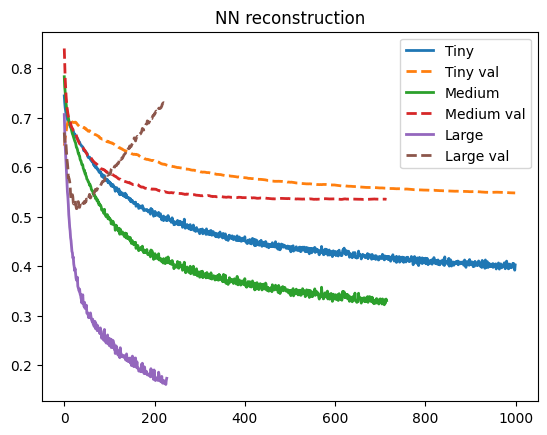

In [43]:
#plt.figure()

for NNdim in ['Tiny','Medium','Large']:

    history = size_histories[NNdim]

    bc     = history.history['binary_crossentropy']
    val_bc = history.history['val_binary_crossentropy']

    plt.plot(range(np.shape(bc)[0]),bc, linewidth=2,)
    plt.plot(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
    plt.title('NN reconstruction')
    #plt.show(block=False)

plt.legend(('Tiny','Tiny val','Medium','Medium val','Large','Large val'))
plt.show()

In [44]:
regularization_coefficient = 0.1
large_reg_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient),input_shape = (FEATURES, )),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dense(2, activation="softmax")
])

dropout_rate = 0.5
large_drop_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", input_shape = (FEATURES, )),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu"),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu"),
    layers.Dropout(dropout_rate),
    layers.Dense(2, activation="softmax")
])

large_reg_drop_model = tf.keras.Sequential([
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient), input_shape = (FEATURES, )),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dropout(dropout_rate),
    layers.Dense(32, activation="elu", kernel_regularizer = tf.keras.regularizers.l2(regularization_coefficient)),
    layers.Dropout(dropout_rate),
    layers.Dense(2, activation="softmax")
])

In [45]:
size_histories['Large_reg'] = compile_and_fit(large_model, 'sizes/Large_reg')
size_histories['Large_drop'] = compile_and_fit(large_model, 'sizes/Large_drop')
size_histories['Large_reg_drop'] = compile_and_fit(large_model, 'sizes/Large_reg_drop')

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 32)                1632      
                                                                 
 dense_129 (Dense)           (None, 32)                1056      
                                                                 
 dense_130 (Dense)           (None, 32)                1056      
                                                                 
 dense_131 (Dense)           (None, 2)                 66        
                                                                 
Total params: 3810 (14.88 KB)
Trainable params: 3810 (14.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 - 2s - loss: 0.1820 - binary_crossentropy: 0.1771 - accuracy: 0.9417 - val_loss: 1.0107 - val_binary_crossentropy: 0.7279 - val_accura

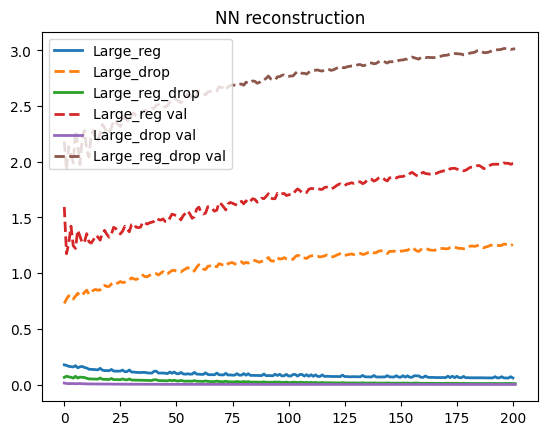

In [46]:
#plt.figure()

for NNdim in ['Large_reg','Large_drop','Large_reg_drop' ]:

    history = size_histories[NNdim]

    bc     = history.history['binary_crossentropy']
    val_bc = history.history['val_binary_crossentropy']

    plt.plot(range(np.shape(bc)[0]),bc, linewidth=2,)
    plt.plot(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
    plt.title('NN reconstruction')
    #plt.show(block=False)

plt.legend(('Large_reg','Large_drop','Large_reg_drop','Large_reg val','Large_drop val','Large_reg_drop val'))
plt.show()